In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('IMDB-Movie-Data.csv')

In [8]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [9]:
df.shape

(1000, 12)

In [10]:
print('Raws are' , df.shape[0])

Raws are 1000


In [11]:
print('Columns are', df.shape[1])

Columns are 12


In [12]:
df.isnull().any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

<Axes: >

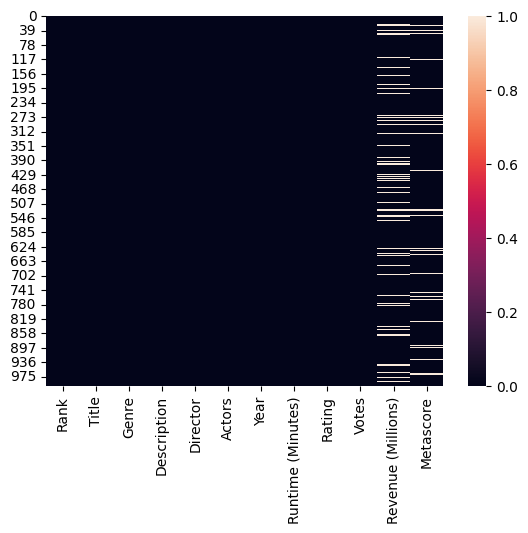

In [17]:
## Visualise the missing vallues
sns.heatmap(df.isnull())

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore             False
dtype: bool

In [21]:
##Check duplicate 
df.duplicated().sum()

np.int64(0)

In [27]:
## Overall statisics
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:
## Display title movie having a runtime >= 180

In [32]:
m=df[df['Runtime (Minutes)']>=180]

In [36]:
m

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0
88,89,The Hateful Eight,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.8,341170,54.12,68.0
311,312,La vie d'Adèle,"Drama,Romance","Adèle's life is changed when she meets Emma, a...",Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.8,103150,2.20,88.0


In [35]:
m['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

In [38]:
## which Year there was the highest voting

In [43]:
df.groupby('Year')['Votes'].mean()

Year
2006    277232.219512
2007    266530.704545
2008    266580.145833
2009    267180.577778
2010    261082.929825
2011    259254.736842
2012    290861.483871
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

<Axes: xlabel='Year', ylabel='Votes'>

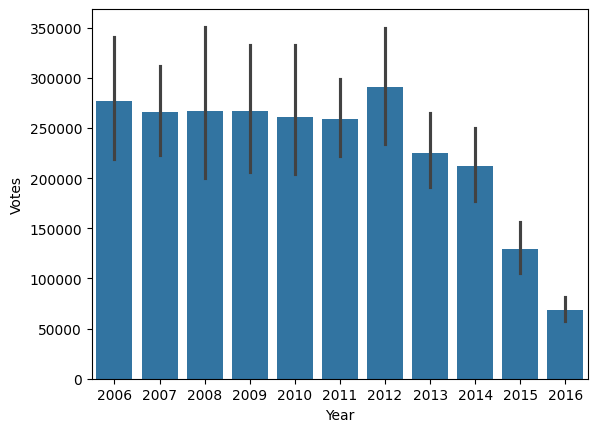

In [39]:
sns.barplot(x='Year',y= 'Votes',data = df)

In [47]:
##Number of movies per year
df['Year'].value_counts()

Year
2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: count, dtype: int64

In [ ]:
## in which year the was the highest revenue

In [51]:
df.groupby('Year')['Revenue (Millions)'].mean()

Year
2006     87.255610
2007     93.074091
2008     97.525417
2009    115.742000
2010    105.081579
2011     93.703333
2012    110.103065
2013     88.084643
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

<Axes: xlabel='Year', ylabel='Revenue (Millions)'>

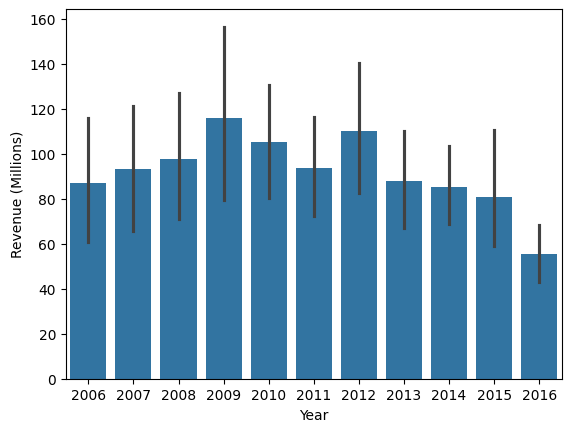

In [49]:
sns.barplot(x='Year',y='Revenue (Millions)', data = df)

In [ ]:
## Find average ratings for each director

In [53]:
df.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


<Axes: xlabel='Director', ylabel='Rating'>

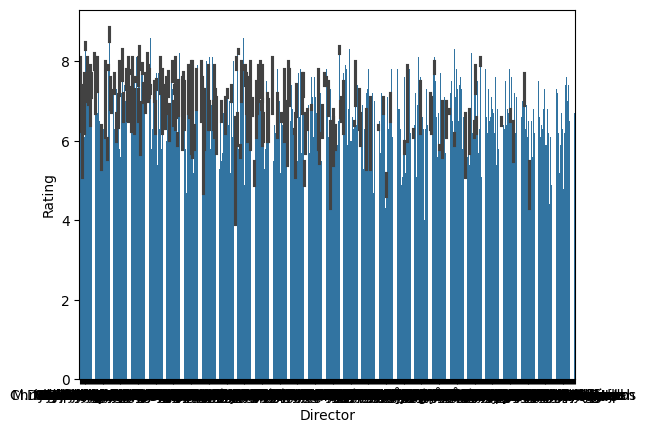

In [63]:
sns.barplot(x ='Director',y ='Rating',data=df)

In [62]:
df.groupby('Director')['Rating'].mean().sort_values(ascending = False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

In [ ]:
## Display Top 10 lengthy movies and Runtime

In [66]:
m1=df.sort_values('Runtime (Minutes)',ascending=False)

In [73]:
m1.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
88,89,The Hateful Eight,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.8,341170,54.12,68.0
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0
311,312,La vie d'Adèle,"Drama,Romance","Adèle's life is changed when she meets Emma, a...",Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.8,103150,2.20,88.0
267,268,Cloud Atlas,"Drama,Sci-Fi",An exploration of how the actions of individua...,Tom Tykwer,"Tom Hanks, Halle Berry, Hugh Grant, Hugo Weaving",2012,172,7.5,298651,27.10,55.0
430,431,3 Idiots,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
75,76,Pirates of the Caribbean: At World's End,"Action,Adventure,Fantasy","Captain Barbossa, Will Turner and Elizabeth Sw...",Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley,Ge...",2007,169,7.1,498821,309.40,50.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
271,272,The Hobbit: An Unexpected Journey,"Adventure,Fantasy","A reluctant hobbit, Bilbo Baggins, sets out to...",Peter Jackson,"Martin Freeman, Ian McKellen, Richard Armitage...",2012,169,7.9,668651,303.00,58.0
425,426,The Curious Case of Benjamin Button,"Drama,Fantasy,Romance","Tells the story of Benjamin Button, a man who ...",David Fincher,"Brad Pitt, Cate Blanchett, Tilda Swinton, Juli...",2008,166,7.8,485075,127.49,70.0
126,127,Transformers: Age of Extinction,"Action,Adventure,Sci-Fi",Autobots must escape sight from a bounty hunte...,Michael Bay,"Mark Wahlberg, Nicola Peltz, Jack Reynor, Stan...",2014,165,5.7,255483,245.43,32.0


In [71]:
m1[['Runtime (Minutes)','Title','Year']]

,Runtime (Minutes),Title,Year
88,187,The Hateful Eight,2015
82,180,The Wolf of Wall Street,2013
311,180,La vie d'Adèle,2013
267,172,Cloud Atlas,2012
430,170,3 Idiots,2009
...,...,...,...
258,81,Lights Out,2016
862,81,"Alexander and the Terrible, Horrible, No Good,...",2014
949,80,Kicks,2016
711,80,La tortue rouge,2016


<Axes: xlabel='Runtime (Minutes)', ylabel='Title'>

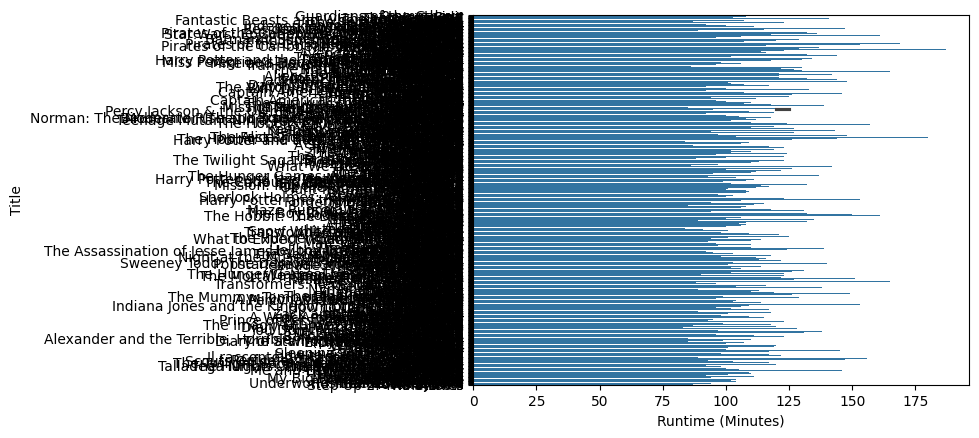

In [72]:
sns.barplot(x='Runtime (Minutes)', y='Title',data= df)

In [74]:
df['Year'].value_counts()

Year
2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

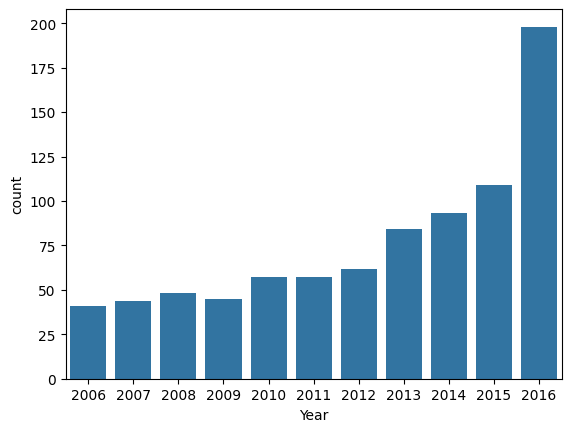

In [76]:
## Visualise the results 
sns.countplot(x='Year',data=df)

In [78]:
## Find the most popular movie titles (Highest revenue)
df.sort_values('Revenue (Millions)',ascending= False)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...
321,322,Lovesong,Drama,The relationship between two friends deepens d...,So Yong Kim,"Riley Keough, Jena Malone, Jessie Ok Gray, Car...",2016,84,6.4,616,0.01,74.0
68,69,Wakefield,Drama,A man's nervous breakdown causes him to leave ...,Robin Swicord,"Bryan Cranston, Jennifer Garner, Beverly D'Ang...",2016,106,7.5,291,0.01,61.0
677,678,"Love, Rosie","Comedy,Romance",Rosie and Alex have been best friends since th...,Christian Ditter,"Lily Collins, Sam Claflin, Christian Cooke, Ja...",2014,102,7.2,80415,0.01,44.0
961,962,Into the Forest,"Drama,Sci-Fi,Thriller","After a massive power outage, two sisters lear...",Patricia Rozema,"Ellen Page, Evan Rachel Wood, Max Minghella,Ca...",2015,101,5.9,10220,0.01,59.0


In [80]:
m2=df.sort_values('Rating', ascending=False)

In [82]:
m2.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0


In [81]:
m2[['Title', 'Director']]

,Title,Director
54,The Dark Knight,Christopher Nolan
80,Inception,Christopher Nolan
36,Interstellar,Christopher Nolan
249,The Intouchables,Olivier Nakache
96,Kimi no na wa,Makoto Shinkai
...,...,...
616,2307: Winter's Dream,Joey Curtis
525,Birth of the Dragon,George Nolfi
237,The Disappointments Room,D.J. Caruso
871,Dragonball Evolution,James Wong


In [83]:
m3= df.sort_values('Revenue (Millions)',ascending= False)

In [85]:
m4=m3[['Revenue (Millions)','Title']]

In [86]:
m4.head(10)

,Revenue (Millions),Title
50,936.63,Star Wars: Episode VII - The Force Awakens
87,760.51,Avatar
85,652.18,Jurassic World
76,623.28,The Avengers
54,533.32,The Dark Knight
12,532.17,Rogue One
119,486.29,Finding Dory
94,458.99,Avengers: Age of Ultron
124,448.13,The Dark Knight Rises
578,424.65,The Hunger Games: Catching Fire


In [ ]:
## Find the average rating of movies year wise

In [87]:
df.groupby('Year')['Rating'].mean()

Year
2006    7.143902
2007    7.140909
2008    6.708333
2009    6.911111
2010    6.894737
2011    6.945614
2012    6.933871
2013    6.832143
2014    6.822581
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

<Axes: xlabel='Year', ylabel='Rating'>

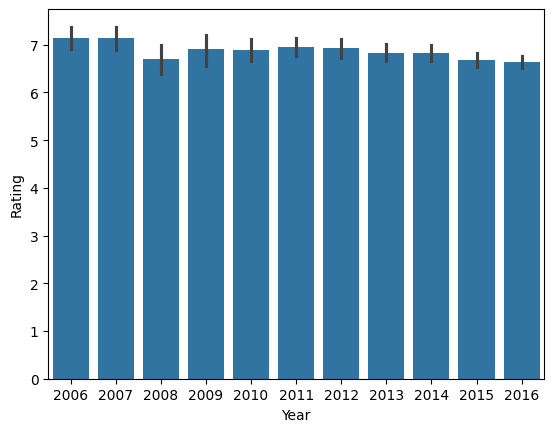

In [88]:
sns.barplot(x='Year',y= 'Rating',data=df)

In [ ]:
### Does the Rating affect revenue?

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

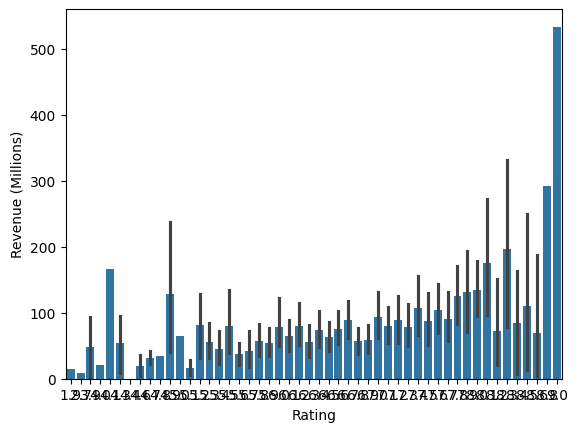

In [90]:
sns.barplot(x='Rating',y='Revenue (Millions)',data=df)

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

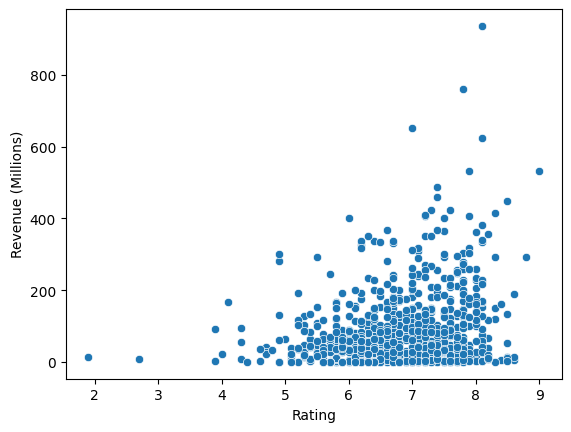

In [91]:
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=df)

In [ ]:
### Clasify MoviesBased on Rating [Excelent, Good, and Average]

In [106]:
def rating(rating):
    if rating>=7:
        print('Excelent')
    elif rating>=6.0:
        print('Good')
    else :
        print('Average')
        

In [ ]:
df['Classification']=df['Rating'].apply(rating)

In [109]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Classification
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,None
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,None
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,None
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,None
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,None


In [ ]:
### Count the number of action movies

In [118]:
df['Genre1']=df['Genre'].apply(lambda x: x.split(',')[0])

In [119]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Classification,Genre1
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,None,Action
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,None,Adventure
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,None,Horror
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,None,Animation
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,None,Action


In [120]:
df['Genre1'].value_counts()

Genre1
Action       268
Comedy       151
Drama        148
Adventure     68
Biography     55
Crime         53
Animation     45
Horror        34
Mystery       11
Sci-Fi         2
Fantasy        2
Thriller       1
Name: count, dtype: int64

In [128]:
len(df[df['Genre'].str.contains('Action')])

277